In [165]:
# import packages
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
# allow more collumns and rows to be seen
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 50)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn import linear_model
from sklearn.feature_selection import RFECV
from sklearn import metrics
import scipy.stats as stats
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Data Cleaning

In [166]:
df = pd.read_csv('decoded_mushrooms.csv')

In [167]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [168]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

## Bar Plots 

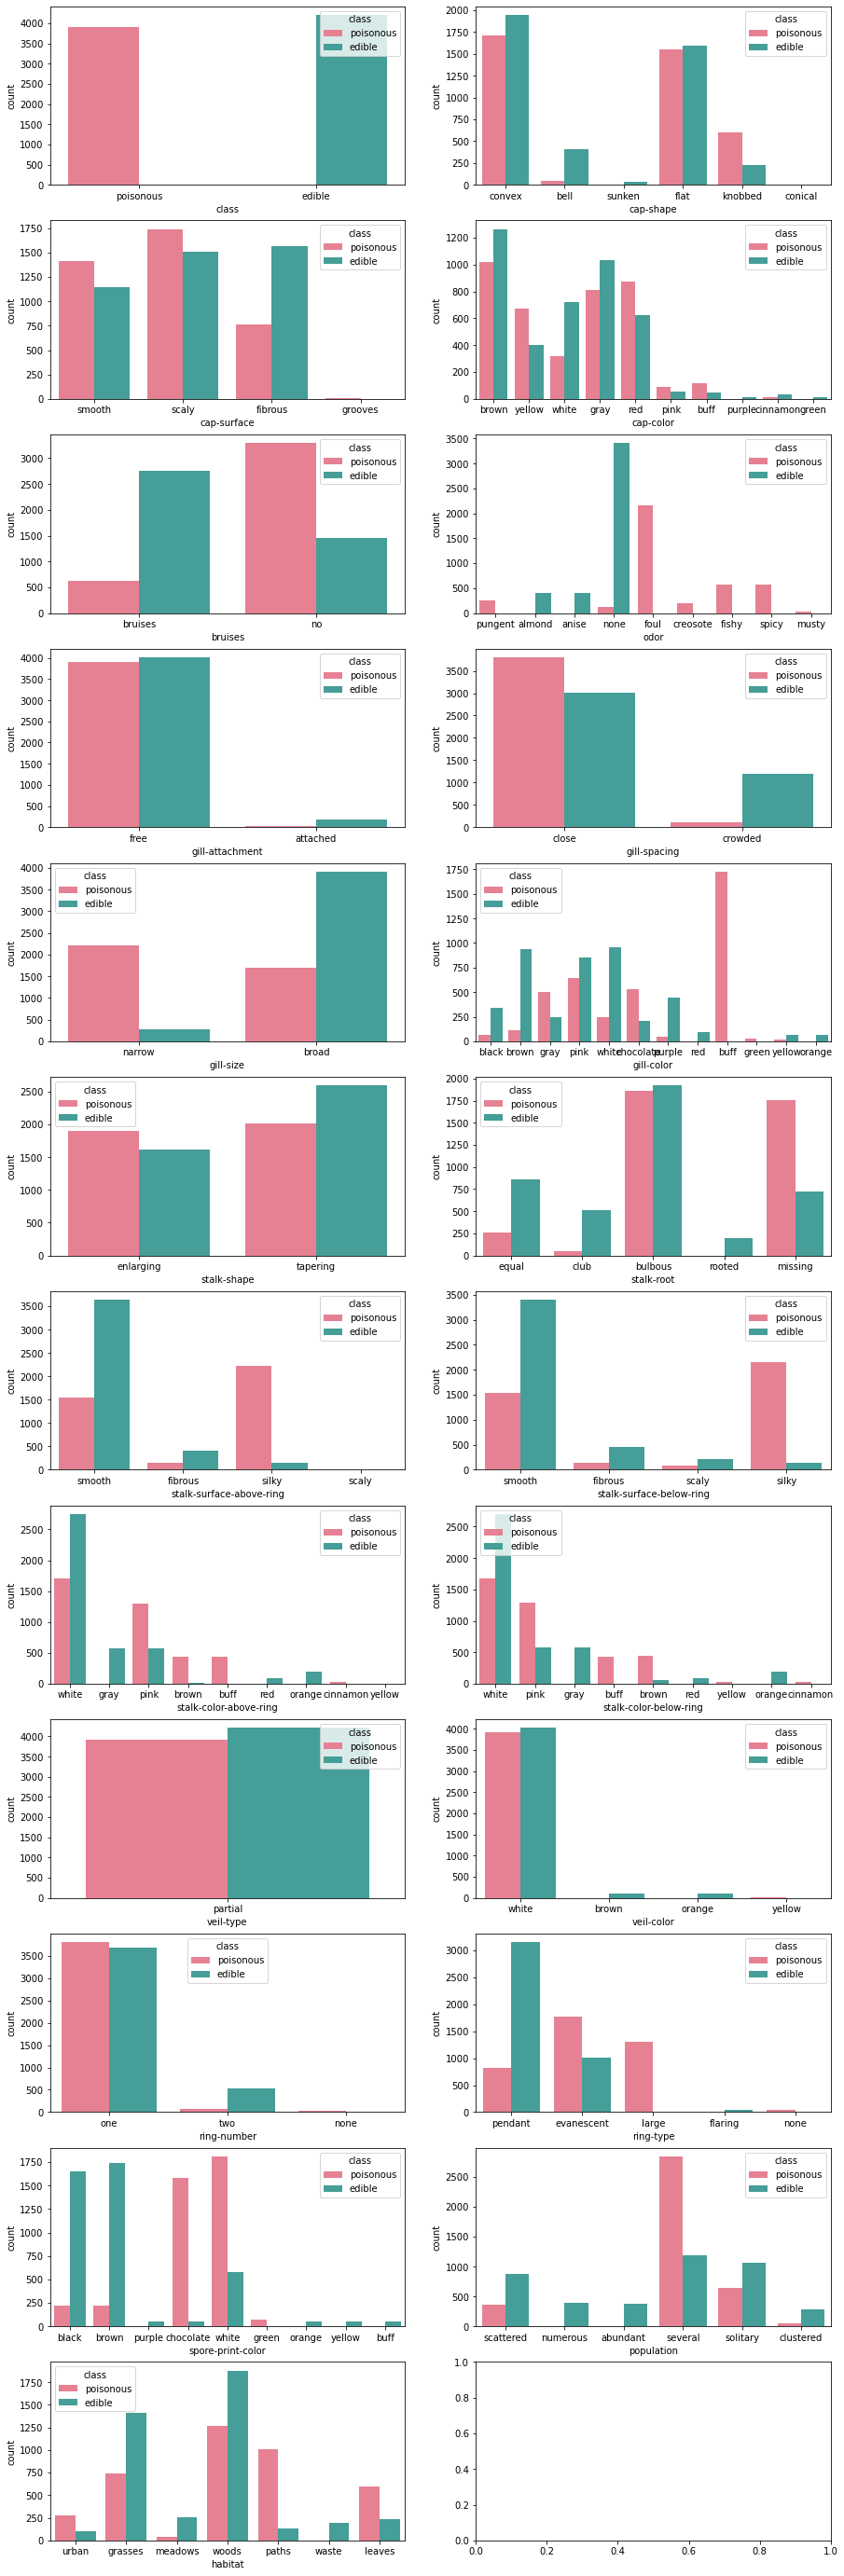

In [99]:
fig, axes = plt.subplots (ncols = 2, nrows = 12, figsize = (15, 50))

for i, column in enumerate(df):
    ax = axes[i//2][i%2]
    fig = sns.countplot(x=column, hue="class", data=df, palette = 'husl', ax=ax)

plt.savefig('bargraphsPE.jpg') 

## Bar Graph Explanations

class: The first bar graph that displays the counts for each class, help us clear any possibility of inaccuracy due to a class imbalance. The data is almost evenly split around the categorical variables edible and poisonous.

cap shape: Mushroom cap shapes that are either convex or flat don't seem to be very good indicators of edibility. That being said however, we can also see that bell shaped caps are more likely to be edible while knob shaped caps are more likely to be poisonous. Though there isn't much to get form sunken or conical shaped mushroom caps but its very unlikely that they would be poisonous or edible, respectively.

cap surface: From this bar graph, we can see that cap surfaces for poisonous and edible mushrooms can really vary. But fibrous cap surfaces are more likely to be edible while a mushroom cap surface with grooves, from what we know, will most likely be poisonous.

cap color: Cap color, according to the distribution of the bar graph, can vary between poisonous and edible mushrooms. However, green and purple mushroom caps are more so characteristics of edible mushrooms.

bruises: Seems that edible mushrooms tend to have more bruises as opposed to poisonous mushrooms which are typically bruise-free.

odor: Interestingly, things that we would typically consider "good" smells are for mainly for edible mushrooms. All other less pleasant smelling mushrooms are indications of a poisonous species.

gill attachment: Gill-attachment doesn't really give us mush information. The proportions of edible to poisonous mushrooms for free and attached gills appear to be very similar according to the graph.

gill spacing: Gill-spacing seem to appear more crowded for edible mushrooms and close for poisonous ones. However, this bar graph isn't the best provider of predictive information.

gill size: A narrow gill size looks more closely associated with poisonous mushrooms while broad gills are more associated with the other.

gill color: For gill color, the colors that stand out the most for being an indicator of being poisonous or edible are brown, purple, red, and orange, or buff and green, respectfully.

stalk shape: There doesn't seem to be mush difference in the distribution of mushrooms by edibility for stalk shape. This may not be helpful in a predictive model.

stalk-root: If the root is rooted it's edible. If the root is equal, club, missing, or bulbous it's more likely to be poisonous.   

Stalk-surface-above-ring: Similarly to the stalk surface below the ring, smooth, fibrous, and scaly are more likely to be edible, but they are not good indicators when determining if a mushrooms will be poisonous or edible. The silky surface is more likely to be poisonous.  

Stalk-surface-below-ring: Stalk surface below the ring are not good for differentiating between poisonous and edible mushrooms. Smooth, fibrous, and scaly surfaces below the ring are more likely to be edible. Meanwhile a silky surface is more likely to be poisonous.   

Stalk-color-above-ring: Similar to stalk colors below the ring, pink and white stalk colors above the ring are not good indicators of whether a mushroom is poisonous or edible. Gray,red, or orange colors above the ring are edible. Buff, yellow, and cinnamon are poisonous, and brown is almost all poisonous.  

Stalk-color-below-ring: White and pink stalk colors are poor indicators when determining whether a mushroom is poisonous or edible. The white color is more likely to be edible. The pink color is more likely to be poisonous. Gray or Orange as the stalk color below the ring means the mushroom is edible. Meanwhile a buff or red stalk color below the ring shows the mushroom is poisonous. The brown color is more likely to be poisonous. a Cinnamon color below the ring means the mushroom is edible.    

Veil-type: Veil-type is not a good indicator of whether a mushroom is poisonous or not. 

Veil-color: Mushrooms with brown and orange veils are edible. Yellow viels are a danger sign. Mushrooms with a white veil are not good indicators of whether the mushroom is poisonous or edible.

Ring number: There's a lot of uncertainty with one ring. One ring could be edible or poisonous. Two rings mushrooms are likely to be edible, but we can't be positive. Mushrooms without rings are poisonous. 

Ring-type: Large rings and no rings are a sign the mushroom is poisonous. Flaring mushrooms are edible. Pendant mushrooms are more likely to be edible, but beware. Evanescent mushrooms are more likely to be poisonous, but many are edible.   

Spore-print-color: Buff, yellow, orange, and purple mushrooms are edible. Green mushrooms are poisonous. Black and brown mushrooms are mostly edible, but not entirely. Chocolate and white colored mushrooms are mostly poisonous.

Population: The population graph demonstrates edible mushrooms can be found in numerous areas and abundantly. There are several areas were mushrooms are poisonous. Both poisonous and edible mushrooms can be found scattered, in solitary, and clustered.

Habitat: From the habitat graph one can see that waste has edible mushrooms. Wood and grass areas are more likely to have edible mushrooms, but a lot of mushrooms found in the woody and grassy areas are poisonous. Paths are likely to have poisonous mushrooms.  

# Statistically Testing

The chi squared test is used to determine whether there is an association between the two categorical variables (edible and poisonous).

## Rings 

In [100]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

table = [[len(df.loc[df['ring-number'] == 'one'].loc[df['class'] == 'poisonous']), len(df.loc[df['ring-number'] == 'one'].loc[df['class'] == 'edible'])],
         [len(df.loc[df['ring-number'] == 'two'].loc[df['class'] == 'poisonous']), len(df.loc[df['ring-number'] == 'two'].loc[df['class'] == 'edible'])],
         [len(df.loc[df['ring-number'] == 'none'].loc[df['class'] == 'poisonous']), len(df.loc[df['ring-number'] == 'none'].loc[df['class'] == 'edible'])]]
print(table)
         
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

stat    

[[3808, 3680], [72, 528], [36, 0]]
dof=2
[[3609.42983752 3878.57016248]
 [ 289.21713442  310.78286558]
 [  17.35302806   18.64697194]]


374.7368308267116

## Spore Print Color 

The Chi-Squared test is used to check the significance of spore print color to see if it's classified as edible or poisonous.

In [101]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [102]:
table = [[len(df.loc[df['spore-print-color'] == 'black'].loc[df['class'] == 'poisonous']), len(df.loc[df['spore-print-color'] == 'black'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['spore-print-color'] == 'brown'].loc[df['class'] == 'poisonous']), len(df.loc[df['spore-print-color'] == 'brown'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['spore-print-color'] == 'purple'].loc[df['class'] == 'poisonous']), len(df.loc[df['spore-print-color'] == 'purple'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['spore-print-color'] == 'chocolate'].loc[df['class'] == 'poisonous']), len(df.loc[df['spore-print-color'] == 'chocolate'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['spore-print-color'] == 'white'].loc[df['class'] == 'poisonous']), len(df.loc[df['spore-print-color'] == 'white'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['spore-print-color'] == 'green'].loc[df['class'] == 'poisonous']), len(df.loc[df['spore-print-color'] == 'green'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['spore-print-color'] == 'orange'].loc[df['class'] == 'poisonous']), len(df.loc[df['spore-print-color'] == 'orange'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['spore-print-color'] == 'yellow'].loc[df['class'] == 'poisonous']), len(df.loc[df['spore-print-color'] == 'yellow'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['spore-print-color'] == 'buff'].loc[df['class'] == 'poisonous']), len(df.loc[df['spore-print-color'] == 'buff'].loc[df['class'] == 'edible'])]]
print(table)

[[224, 1648], [224, 1744], [0, 48], [1584, 48], [1812, 576], [72, 0], [0, 48], [0, 48], [0, 48]]


In [103]:
lst1, lst2 = [], []
for row in table:
    lst1.append(row[0])
    lst2.append(row[1])
lst = [lst1,lst2]

In [104]:
lst

[[224, 224, 0, 1584, 1812, 72, 0, 0, 0],
 [1648, 1744, 48, 48, 576, 0, 48, 48, 48]]

In [105]:
stat, p, dof, expected = chi2_contingency(lst)
print('dof=%d' % dof)
print(expected)

dof=8
[[ 902.35745938  948.63220089   23.13737075  786.67060561 1151.08419498
    34.70605613   23.13737075   23.13737075   23.13737075]
 [ 969.64254062 1019.36779911   24.86262925  845.32939439 1236.91580502
    37.29394387   24.86262925   24.86262925   24.86262925]]


degrees of freedom = 9-1 = 8

In [106]:
stat

4602.033170084604

In [107]:
p

0.0

In [108]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)

print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

probability=0.950, critical=15.507, stat=4602.033
Dependent (reject H0)


In [109]:
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

significance=0.050, p=0.000
Dependent (reject H0)


The 95% confidence interval has a critical value of 15.5. The stat 4602 largely exceeds the critical value and the p-value is 0. It can be assumed spore-color-print is statistically significant.

## Odor 

In [110]:
table = [[len(df.loc[df['odor'] == 'pungent'].loc[df['class'] == 'poisonous']), len(df.loc[df['odor'] == 'pungent'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['odor'] == 'almond'].loc[df['class'] == 'poisonous']), len(df.loc[df['odor'] == 'almond'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['odor'] == 'anise'].loc[df['class'] == 'poisonous']), len(df.loc[df['odor'] == 'anise'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['odor'] == 'none'].loc[df['class'] == 'poisonous']), len(df.loc[df['odor'] == 'none'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['odor'] == 'foul'].loc[df['class'] == 'poisonous']), len(df.loc[df['odor'] == 'foul'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['odor'] == 'creosote'].loc[df['class'] == 'poisonous']), len(df.loc[df['odor'] == 'creosote'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['odor'] == 'fishy'].loc[df['class'] == 'poisonous']), len(df.loc[df['odor'] == 'fishy'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['odor'] == 'spicy'].loc[df['class'] == 'poisonous']), len(df.loc[df['odor'] == 'spicy'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['odor'] == 'musty'].loc[df['class'] == 'poisonous']), len(df.loc[df['odor'] == 'musty'].loc[df['class'] == 'edible'])]]
print(table)

[[256, 0], [0, 400], [0, 400], [120, 3408], [2160, 0], [192, 0], [576, 0], [576, 0], [36, 0]]


In [111]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

dof=8
[[ 123.39931068  132.60068932]
 [ 192.81142294  207.18857706]
 [ 192.81142294  207.18857706]
 [1700.59675037 1827.40324963]
 [1041.1816839  1118.8183161 ]
 [  92.54948301   99.45051699]
 [ 277.64844904  298.35155096]
 [ 277.64844904  298.35155096]
 [  17.35302806   18.64697194]]


In [112]:
print(stat)
print(p)

7659.726740165338
0.0


In [113]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)

print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

probability=0.950, critical=15.507, stat=7659.727
Dependent (reject H0)


In [114]:
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

significance=0.050, p=0.000
Dependent (reject H0)


The 95% confidence interval has a critical value of 15.5. The stat 7659.7 largely exceeds the critical value and the p-value is 0. It can be assumed spore-color-print is statistically significant.

## Habitat 

<AxesSubplot:xlabel='habitat', ylabel='count'>

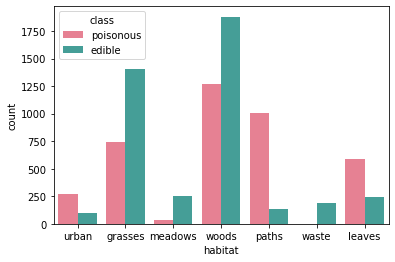

In [115]:
sns.countplot(x='habitat', hue="class", data=df, palette = 'husl')

In [116]:
table = [[len(df.loc[df['habitat'] == 'urban'].loc[df['class'] == 'poisonous']), len(df.loc[df['habitat'] == 'urban'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['habitat'] == 'paths'].loc[df['class'] == 'poisonous']), len(df.loc[df['habitat'] == 'paths'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['habitat'] == 'waste'].loc[df['class'] == 'poisonous']), len(df.loc[df['habitat'] == 'waste'].loc[df['class'] == 'edible'])]]

In [117]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

dof=2
[[ 67.57541899  28.42458101]
 [805.27374302 338.72625698]
 [135.15083799  56.84916201]]


In [118]:
print(stat)
print(p)

857.0460482913313
7.849016554156539e-187


In [120]:
# interpret test-statistic
prob = 0.999
critical = chi2.ppf(prob, dof)

print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

probability=0.999, critical=13.816, stat=857.046
Dependent (reject H0)


The critical value is about 6 and the stat is much larger. The p value is very small. That means this is statistically significant.

## Bruises

<AxesSubplot:xlabel='bruises', ylabel='count'>

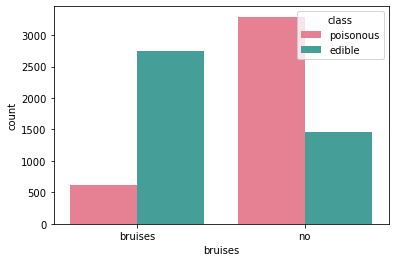

In [169]:
sns.countplot(x='bruises', hue="class", data=df, palette = 'husl')

In [171]:
table = [[len(df.loc[df['bruises'] == 'bruises'].loc[df['class'] == 'poisonous']), len(df.loc[df['bruises'] == 'bruises'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['bruises'] == 'no'].loc[df['class'] == 'poisonous']), len(df.loc[df['bruises'] == 'no'].loc[df['class'] == 'edible'])]]

In [172]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

dof=1
[[1627.32840965 1748.67159035]
 [2288.67159035 2459.32840965]]


In [173]:
print(stat)
print(p)

2041.4156474619554
0.0


In [174]:
# interpret test-statistic
prob = 0.999
critical = chi2.ppf(prob, dof)

print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

probability=0.999, critical=10.828, stat=2041.416
Dependent (reject H0)


The 99.9% confidence score is 10.282 and our stat of 2041.416 greatly exceeds that.

## Gill-spacing 

<AxesSubplot:xlabel='gill-spacing', ylabel='count'>

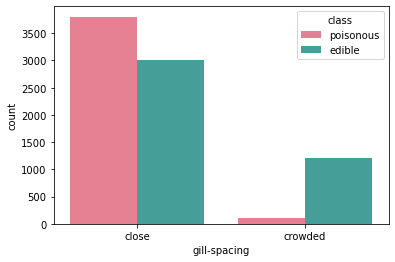

In [179]:
sns.countplot(x='gill-spacing', hue="class", data=df, palette = 'husl')

In [180]:
table = [[len(df.loc[df['gill-spacing'] == 'close'].loc[df['class'] == 'poisonous']), len(df.loc[df['gill-spacing'] == 'close'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['gill-spacing'] == 'crowded'].loc[df['class'] == 'poisonous']), len(df.loc[df['gill-spacing'] == 'crowded'].loc[df['class'] == 'edible'])]]

In [181]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

dof=1
[[3283.57853274 3528.42146726]
 [ 632.42146726  679.57853274]]


In [182]:
print(stat)
print(p)

984.1433330144739
5.0229776137324786e-216


In [183]:
# interpret test-statistic
prob = 0.999
critical = chi2.ppf(prob, dof)

print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

probability=0.999, critical=10.828, stat=984.143
Dependent (reject H0)


The 99.9% confidence score is 10.828 and our stat of 984 exceeds that.

## Gill-size

<AxesSubplot:xlabel='gill-size', ylabel='count'>

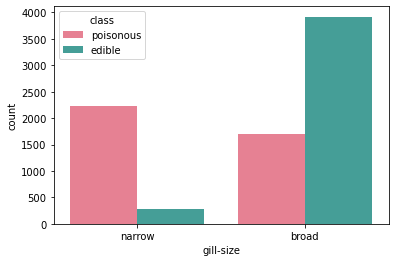

In [176]:
sns.countplot(x='gill-size', hue="class", data=df, palette = 'husl')

In [184]:
table = [[len(df.loc[df['gill-size'] == 'narrow'].loc[df['class'] == 'poisonous']), len(df.loc[df['gill-size'] == 'narrow'].loc[df['class'] == 'edible'])],
        [len(df.loc[df['gill-size'] == 'broad'].loc[df['class'] == 'poisonous']), len(df.loc[df['gill-size'] == 'broad'].loc[df['class'] == 'edible'])]]

In [185]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

dof=1
[[1210.85573609 1301.14426391]
 [2705.14426391 2906.85573609]]


In [186]:
print(stat)
print(p)

2366.8342569059605
0.0


In [187]:
# interpret test-statistic
prob = 0.999
critical = chi2.ppf(prob, dof)

print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

probability=0.999, critical=10.828, stat=2366.834
Dependent (reject H0)


The 99.9% confidence score is 10.828 and our stat of 2366.834 exceeds that.

## Veil Type

<AxesSubplot:xlabel='veil-type', ylabel='count'>

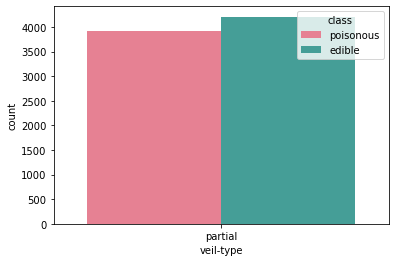

In [177]:
sns.countplot(x='veil-type', hue="class", data=df, palette = 'husl')

# Feature Engineering

In [21]:
#needs to be edited based on bar graphs

## Feature One

For feature one, looked at the habitat column and split it based on if each feature has human interaction or not.

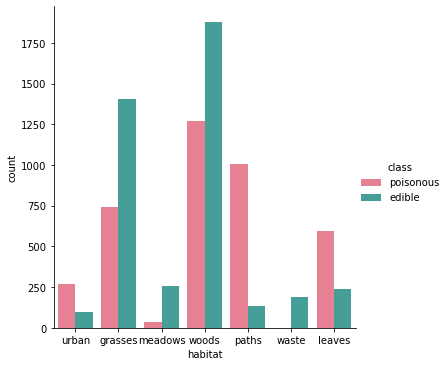

In [44]:
sns.catplot(x='habitat', hue="class", kind='count', data=df, palette = 'husl')

In [38]:
df['human_interference'] = np.where((df['habitat'] == 'urban') | (df['habitat'] == 'paths') | (df['habitat'] == 'waste'), 0, 1)

In [39]:
df['human_interference']

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    1
8123    1
Name: human_interference, Length: 8124, dtype: int32

In [40]:
df['human_interference'].value_counts()

1    6420
0    1704
Name: human_interference, dtype: int64

1704 human areas and 6420 nature areas

## Feature Two 

For feature 2 split on what was considered good odors and bad odors.

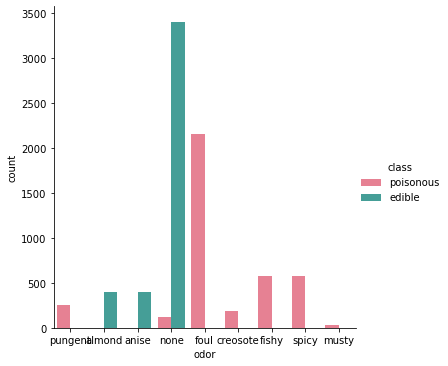

In [45]:
sns.catplot(x='odor', hue="class", kind='count', data=df, palette = 'husl')

In [42]:
df['smell_quality'] = np.where((df['odor'] == 'almond') | (df['odor'] == 'anise') | (df['odor'] == 'none') | (df['odor'] == 'spicy'), 0, 1)

0 for fine smell 1 for bad smell

In [43]:
df['smell_quality'].value_counts()

0    4904
1    3220
Name: smell_quality, dtype: int64

4904 smell fine and 3220 smell bad

## Feature 3 

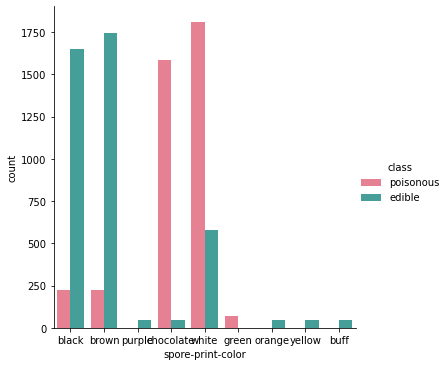

In [47]:
sns.catplot(x='spore-print-color', hue="class", kind='count', data=df, palette = 'husl')

Chlorophyllum molybdites is responsible for the mushrooms green color.

In [48]:
df['c_molybdites'] = np.where((df['spore-print-color'] == 'green'), 0, 1)

edible

In [50]:
df['spore-edible'] = np.where((df['spore-print-color'] == 'purple') | (df['spore-print-color'] == 'orange') |
                              (df['spore-print-color'] == 'yellow') | (df['spore-print-color'] == 'buff'), 0 , 1)

In [51]:
df['spore-edible'].value_counts()

1    7932
0     192
Name: spore-edible, dtype: int64

0 edible 1 poisonous

## Feature 4 

According to the bar graph mushrooms without rings are poisonous.

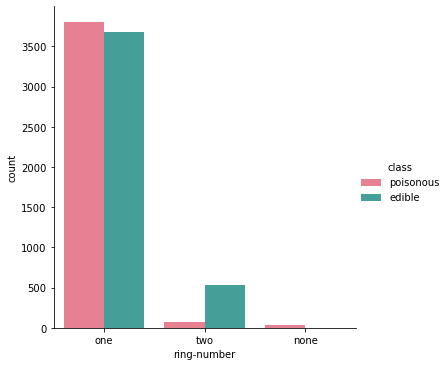

In [52]:
sns.catplot(x='ring-number', hue="class", kind='count', data=df, palette = 'husl')

In [53]:
df['no_rings'] = np.where(df['ring-number'] == 'none', 0, 1)

0 no rings, 1 rings

In [54]:
df['no_rings'].value_counts()

1    8088
0      36
Name: no_rings, dtype: int64

# Modeling

## Logistic Regression

In [150]:
df['cap-shape'].unique()
df['cap-shape'] = df['cap-shape'].map({'convex':1, 'bell':2, 'sunken':3, 'flat':4, 'knobbed':5, 'conical':6})
df['cap-surface'].unique()
df['cap-surface'] = df['cap-surface'].map({'smooth':1, 'scaly':2, 'fibrous':3, 'grooves':4})
df['cap-color'].unique()
df['cap-color'] = df['cap-color'].map({'brown':1, 'yellow':2, 'white':3, 'gray':4, 'red':5, 'pink':6, 'buff':7, 
                                       'purple':8, 'cinnamon':9, 'green': 10})
df['bruises'].unique()
df['bruises'] = df['bruises'].map({'bruises':1, 'no':2})
df['odor'].unique()
df['odor'] = df['odor'].map({'pungent':1, 'almond':2, 'anise':3, 'none':4, 'foul':5, 'creosote':6, 'fishy':7, 
                                       'spicy':8, 'musty': 9})
df['gill-attachment'].unique()
df['gill-attachment'] = df['gill-attachment'].map({'free':1, 'attached':2})
df['gill-spacing'].unique()
df['gill-spacing'] = df['gill-spacing'].map({'close':1, 'crowded':2})
df['gill-size'].unique()
df['gill-size'] = df['gill-size'].map({'narrow':1, 'broad':2})
df['gill-color'].unique()
df['gill-color'] = df['gill-color'].map({'black':1, 'brown':2, 'gray':3, 'pink':4, 'white':5, 'chocolate':6, 'purple':7, 
                                       'green':8, 'buff': 9, 'red':10, 'yellow':11, 'orange':12})
df['stalk-shape'].unique()
df['stalk-shape'] = df['stalk-shape'].map({'enlarging':1, 'tapering':2})
df['stalk-root'].unique()
df['stalk-root'] = df['stalk-root'].map({'equal':1, 'club':2, 'bulbous':3, 'rooted':4, 'missing':5})
df['stalk-surface-above-ring'].unique()
df['stalk-surface-above-ring'] = df['stalk-surface-above-ring'].map({'smooth':1, 'fibrous':2, 'silky':3, 'scaly':4})
df['stalk-surface-below-ring'].unique()
df['stalk-surface-below-ring'] = df['stalk-surface-below-ring'].map({'smooth':1, 'fibrous':2, 'scaly':3, 'silky':4})
df['stalk-color-above-ring'].unique()
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].map({'white':1, 'gray':2, 'pink':3, 'brown':4, 'buff':5, 'red':6,
                                                                 'orange':7, 'cinnamon':8, 'yellow': 9})
df['stalk-color-below-ring'].unique()
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].map({'white':1, 'pink':2, 'gray':3, 'buff':4, 'brown':5,
                                                                    'red':6, 'yellow':7, 'orange':8, 'cinnamon': 9})
df['veil-type'].unique()
df['veil-type'] = df['veil-type'].map({'partial':1})
df['veil-color'].unique()
df['veil-color'] = df['veil-color'].map({'white':1, 'brown':2, 'orange':3, 'yellow':4})
df['ring-number'].unique()
df['ring-number'] = df['ring-number'].map({'one':1, 'two':2, 'none':3})
df['ring-type'].unique()
df['ring-type'] = df['ring-type'].map({'pendant':1, 'evanescent':2, 'large':3, 'flaring':4, 'none':5})
df['spore-print-color'].unique()
df['spore-print-color'] = df['spore-print-color'].map({'black':1, 'brown':2, 'purple':3, 'chocolate':4, 'white':5, 'green':6, 
                                                       'orange':7, 'yellow':8, 'buff': 9})
df['population'].unique()
df['population'] = df['population'].map({'scattered':1, 'numerous':2, 'abundant':3, 'several':4, 'solitary':5, 'clustered':6})
df['habitat'].unique()
df['habitat'] = df['habitat'].map({'urban':1, 'grasses':2, 'meadows':3, 'woods':4, 'paths':5, 'waste':6, 'leaves':7})
df['class'].unique()
df['class'] = df['class'].map({'poisonous':1, 'edible':2})

In [151]:
target = df['class']
relevant_columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
dummy_dataframe = pd.get_dummies(df[relevant_columns], drop_first = True)

In [152]:
# fit a logistic regression model and store the class predictions
logreg = LogisticRegression(random_state=42)
X = df[relevant_columns]
y = target
logreg.fit(X, y)
df['mushroom_pred_class'] = logreg.predict(X)

C:\Users\berns\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dummy_dataframe, target, test_size = 0.25, random_state = 21)

In [154]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\berns\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
#grid search log regression
#check c value - regularization
#check solver - lgbs, sag, etc
#check max iter 
#penalty - l1 or l2

In [155]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [156]:
print(y_train_pred)
print(y_test_pred)

[2 1 2 ... 1 1 1]
[2 2 1 ... 2 2 2]


In [157]:
df['class'].value_counts()[2]/(df['class'].value_counts()[2] + df['class'].value_counts()[1])

0.517971442639094

In [158]:
# how did our tree do?
df['class'].value_counts()[1]/df['class'].value_counts().sum()

0.48202855736090594

In [159]:
# generate prediction and output metric (use accuracy)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(acc)

0.5096011816838996


In [160]:
#confusion matrix evaluations - generate predictions and compare against actual - #decision tree accuracy notebook 
#accuracy score 

In [161]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(confusion_matrix(y_test,y_test_pred))  
print(classification_report(y_test,y_test_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_test_pred)))

[[ 960   14]
 [  14 1043]]
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       974
           2       0.99      0.99      0.99      1057

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031

The accuracy score is 0.9862136878385032


In [162]:
logreg.coef_

array([[ 0.04505706,  1.10461031,  0.08200107,  8.35040811, -3.14454442,
        -1.34772283,  2.73789289,  9.48286165, -0.36337315,  1.04690295,
         1.96206526, -1.72263146, -2.30468778, -0.527686  ,  0.42554602,
        -4.58901182,  1.50807022,  1.14520998, -0.50337364, -1.21347522,
         0.74431256,  0.29814758]])

In [163]:
list(zip(relevant_columns, logreg.coef_[0]))

[('cap-shape', 0.04505706219769619),
 ('cap-surface', 1.1046103073307532),
 ('cap-color', 0.08200107109999938),
 ('bruises', 8.35040810888774),
 ('odor', -3.1445444212433618),
 ('gill-attachment', -1.3477228266892562),
 ('gill-spacing', 2.7378928930950135),
 ('gill-size', 9.48286164660574),
 ('gill-color', -0.3633731454535025),
 ('stalk-shape', 1.0469029460294492),
 ('stalk-root', 1.9620652558083982),
 ('stalk-surface-above-ring', -1.7226314591725664),
 ('stalk-surface-below-ring', -2.304687781488965),
 ('stalk-color-above-ring', -0.52768599680718),
 ('stalk-color-below-ring', 0.4255460181407683),
 ('veil-type', -4.589011819185999),
 ('veil-color', 1.5080702198652678),
 ('ring-number', 1.1452099843065406),
 ('ring-type', -0.5033736379825839),
 ('spore-print-color', -1.2134752197462144),
 ('population', 0.7443125599817337),
 ('habitat', 0.2981475829523198)]

In [ ]:
#which feature helps distinguish between poisonous and edible? make recommendations! 
#-bruises : 8.3
#-odor : -3.1
#-gill-spacing, 2.7
#-gill-size, 9.5
#-veil-type, -4.5

## Logistic Regression Without Spore Color Pring 

Logistic regression will be used to show the relationship between poisonous and edible mushrooms and their different qualities (independent variables).

In [33]:
target = df['class']
relevant_columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'population', 'habitat']
dummy_dataframe = pd.get_dummies(df[relevant_columns], drop_first = True)

In [136]:
dummy_dataframe.shape

(8124, 21)

In [137]:
len(relevant_columns)

21

In [34]:
# fit a logistic regression model and store the class predictions
logreg = LogisticRegression(random_state=42)
X = df[relevant_columns]
y = target
logreg.fit(X, y)
df['mushroom_pred_class'] = logreg.predict(X)

C:\Users\berns\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dummy_dataframe, target, test_size = 0.25, random_state = 21)

In [139]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\berns\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [140]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [141]:
print(y_train_pred)
print(y_test_pred)

[2 1 2 ... 1 1 1]
[2 2 1 ... 2 2 2]


In [142]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(confusion_matrix(y_test,y_test_pred))  
print(classification_report(y_test,y_test_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_test_pred)))

[[ 951   23]
 [  25 1032]]
              precision    recall  f1-score   support

           1       0.97      0.98      0.98       974
           2       0.98      0.98      0.98      1057

    accuracy                           0.98      2031
   macro avg       0.98      0.98      0.98      2031
weighted avg       0.98      0.98      0.98      2031

The accuracy score is 0.9763663220088626


In [143]:
logreg.coef_

array([[-0.02294995,  1.20162856,  0.03097545,  8.12775968, -3.25796643,
        -2.17198798,  3.59592279, 10.01343376, -0.39906037,  0.18282911,
         1.72296813, -2.21704544, -2.20537161, -0.26195565,  0.20387901,
        -2.58542571, -1.69088785, -2.37080398, -1.09909747,  0.69694546,
         0.18414455]])

In [130]:
#where the coef is high - better predictor
#what am i trying to predict - which variables to use in the model

In [144]:
list(zip(relevant_columns, logreg.coef_[0]))

[('cap-shape', -0.022949947159576108),
 ('cap-surface', 1.201628564665274),
 ('cap-color', 0.030975448325747466),
 ('bruises', 8.127759683151313),
 ('odor', -3.257966429168235),
 ('gill-attachment', -2.1719879758766307),
 ('gill-spacing', 3.595922786875127),
 ('gill-size', 10.0134337592603),
 ('gill-color', -0.39906036843576953),
 ('stalk-shape', 0.18282910878496503),
 ('stalk-root', 1.7229681280010927),
 ('stalk-surface-above-ring', -2.217045444397744),
 ('stalk-surface-below-ring', -2.2053716067010596),
 ('stalk-color-above-ring', -0.26195564920237074),
 ('stalk-color-below-ring', 0.20387901345854353),
 ('veil-type', -2.5854257075568543),
 ('veil-color', -1.6908878545202073),
 ('ring-number', -2.3708039828989866),
 ('ring-type', -1.099097471016855),
 ('population', 0.6969454602587808),
 ('habitat', 0.1841445542913516)]

## Random Forest

Precision = TP/(TP+FP) 

recall = TP/(TP +FN)

want recall

look into specificity

In [39]:
target = df['class']
classy = df.drop("class", axis=1)

In [40]:
data = pd.get_dummies(classy)
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,mushroom_pred_class
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,2,1,2,1,1,2,1,1,2,1,1,1,1,1,1,1,1,2,2,2,2
2,2,1,3,1,3,1,1,2,2,1,2,1,1,1,1,1,1,1,1,2,2,3,2
3,1,2,3,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,4,2,4,1,2,2,1,2,1,1,1,1,1,1,1,1,2,2,3,2,2


In [41]:
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = .25, random_state = 27)

In [42]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=5)

In [43]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

DecisionTreeClassifier(max_depth=5, presort=False)

In [44]:
tree_clf.feature_importances_

array([0.        , 0.00132467, 0.        , 0.        , 0.06417762,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00356113, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02976879,
       0.        , 0.        , 0.90116779])

In [45]:
# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[1007    2]
 [   0 1022]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1009
           2       1.00      1.00      1.00      1022

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [46]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 99.9%


In [47]:
# Instantiate a BaggingClassifier
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [48]:
# Fit to the training data
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [49]:
BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        presort=False),
                  n_estimators=20)

In [50]:
# Training accuracy score
bagged_tree.score(data_train, target_train)

0.999015263417036

In [51]:
# Test accuracy score
bagged_tree.score(data_test, target_test)

1.0

In [52]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, target_train)

RandomForestClassifier(max_depth=5)

In [53]:
# Training accuracy score
forest.score(data_train, target_train)

0.9983587723617265

In [54]:
# Test accuracy score
forest.score(data_test, target_test)

0.9960610536681438

In [55]:
# Instantiate and fit a RandomForestClassifier
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 2)
forest_2.fit(data_train, target_train)

RandomForestClassifier(max_depth=2, max_features=10, n_estimators=5)

In [56]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(max_depth=2, max_features=10, n_estimators=5)

In [57]:
# First tree from forest_2
rf_tree_1 = forest_2.estimators_[0]

In [58]:
# Second tree from forest_2
rf_tree_2 = forest_2.estimators_[1]

In [59]:
df['class'].value_counts()

2    4208
1    3916
Name: class, dtype: int64

In [60]:
df['class'].value_counts()[2]/(df['class'].value_counts()[2] + df['class'].value_counts()[1])

0.517971442639094

In [90]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(confusion_matrix(y_test,y_test_pred))  
print(classification_report(y_test,y_test_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_test_pred)))

[[ 974    0]
 [   0 1057]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       974
           2       1.00      1.00      1.00      1057

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

The accuracy score is 1.0


## Without Spore Print Color 

In [61]:
target = df['class']
class_spore = df.drop(["class", "spore-print-color"], axis=1)

In [62]:
data = pd.get_dummies(class_spore)
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,population,habitat,mushroom_pred_class
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,2,1,2,1,1,2,1,1,2,1,1,1,1,1,1,1,1,2,2,2
2,2,1,3,1,3,1,1,2,2,1,2,1,1,1,1,1,1,1,1,2,3,2
3,1,2,3,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,4,2,4,1,2,2,1,2,1,1,1,1,1,1,1,1,2,3,2,2


In [63]:
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = .25, random_state = 27)

In [65]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=5)

In [66]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

DecisionTreeClassifier(max_depth=5, presort=False)

In [67]:
tree_clf.feature_importances_

array([0.        , 0.00132986, 0.00167144, 0.        , 0.06468923,
       0.        , 0.        , 0.        , 0.00677775, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00630015,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01087985, 0.90835172])

In [68]:
# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[ 992   17]
 [   0 1022]]
              precision    recall  f1-score   support

           1       1.00      0.98      0.99      1009
           2       0.98      1.00      0.99      1022

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



In [69]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 99.16%


In [70]:
# Instantiate a BaggingClassifier
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [71]:
# Fit to the training data
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [72]:
BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        presort=False),
                  n_estimators=20)

In [73]:
# Training accuracy score
bagged_tree.score(data_train, target_train)

0.9955686853766618

In [74]:
# Test accuracy score
bagged_tree.score(data_test, target_test)

0.9916297390448056

In [75]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, target_train)

RandomForestClassifier(max_depth=5)

In [76]:
# Training accuracy score
forest.score(data_train, target_train)

0.9945839487936977

In [77]:
# Test accuracy score
forest.score(data_test, target_test)

0.9935992122107337

In [78]:
# Instantiate and fit a RandomForestClassifier
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 2)
forest_2.fit(data_train, target_train)

RandomForestClassifier(max_depth=2, max_features=10, n_estimators=5)

In [79]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(max_depth=2, max_features=10, n_estimators=5)

In [80]:
# First tree from forest_2
rf_tree_1 = forest_2.estimators_[0]

In [81]:
# Second tree from forest_2
rf_tree_2 = forest_2.estimators_[1]

In [82]:
#rechecking
df['class'].value_counts()

2    4208
1    3916
Name: class, dtype: int64

In [83]:
df['class'].value_counts()[2]/(df['class'].value_counts()[2] + df['class'].value_counts()[1])

0.517971442639094

## Grid Search 

In [ ]:
#give an example with a single mushroom - individual observations

In [ ]:
#coefficients - beta